In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

C:\Users\DELL\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [32]:
len(train)

891

In [17]:
#function to load the dataset, split to x and y, drop PassengerId, name, ticket variables, split the train dataset to train and validation
# def load_dataset(data):
    
#     data = pd.read_csv(data)
#     x = data.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
#     y = data['Survived']
        
#     #splitting to train and test sets
#     x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=89)
        
#     return x_train, x_val, y_train, y_val

In [23]:
#x_train, x_val, y_train, y_val = load_dataset('train.csv')

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [34]:
#checking missing values

train_missing = ((train.isnull().sum())/len(train))*100
test_missing = ((test.isnull().sum())/len(test))*100
print(train_missing)
#drop cabin variable 

#variables to drop -->PassengerId, Cabin, Name, Ticket
#variables to impute --> embarked, age, 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


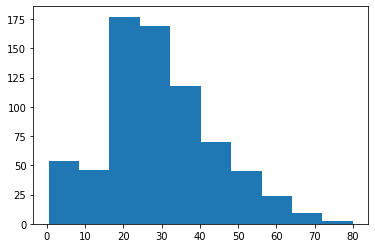

In [35]:
#visualizing age variable to decide wehther to impute mean or median 

plt.hist(train.Age.values)
plt.show()

# impute median

In [9]:
train['Embarked'].mode()[0]

'S'

In [36]:
#imputing the median for age variable & mode for Embarked variable
    
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [37]:
#imputing median for age  & fare in the test set
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
#train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode())

In [38]:
#dropping the cabin variable as it has more than 50% of its values missing
train.drop(['Cabin'],axis=1, inplace=True)
test.drop(['Cabin'],axis=1, inplace=True)

In [39]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [46]:
#category encoding categorical variables --> sex, embarked
def category_encode(dataset, variables):
    for variable in variables:
        
        dataset[variable] = dataset[variable].astype('category')
        dataset[variable] = dataset[variable].cat.codes
    
    return dataset
# train['Sex'] = train['Sex'].astype('category')
# train['Embarked'] = train['Embarked'].astype('category')
# test['Sex'] = test['Sex'].astype('category')
# test['Embarked'] = test['Embarked'].astype('category')

# train['Sex'] = train['Sex'].cat.codes
# train['Embarked'] = train['Embarked'].cat.codes
# test['Sex'] = test['Sex'].cat.codes
# test['Embarked'] = test['Embarked'].cat.codes

In [47]:
category_encode(train, ['Sex','Embarked'])
category_encode(test,['Sex','Embarked'])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,2


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


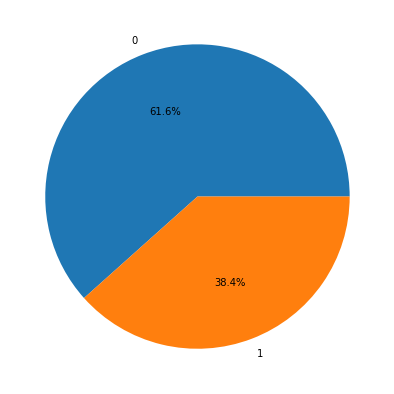

In [49]:
#visualizing class imbalance in the train data set
labels, frequencies = np.unique(train.Survived.values, return_counts=True)
plt.figure(figsize = (7,7))
plt.pie(frequencies,labels=labels,autopct = '%1.1f%%' )
plt.show()

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [50]:
#splitting to x and y --> dropping variables PassengerId, Name, Ticket

x = train.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
y = train['Survived']

x_test = test.drop(['PassengerId','Name','Ticket'], axis=1)



In [51]:
#splitting train set to train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3, random_state=89)

In [52]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
156,3,0,16.0,0,0,7.7333,1
412,1,0,33.0,1,0,90.0000,1
817,2,1,31.0,1,1,37.0042,0
686,3,1,14.0,4,1,39.6875,2
318,1,0,31.0,0,2,164.8667,2


In [53]:
#resampling to balance the train set --> SMOTE resampling
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x_train, y_train)
#help(SMOTE)

In [54]:
print('X_train:{}, Y_train:{}, Resampled X:{}, Resampled Y:{}'.format(len(x_train),len(y_train),len(x_smote), len(y_smote)))

X_train:623, Y_train:623, Resampled X:760, Resampled Y:760


In [55]:
#Model Fitting

randomforest = RandomForestClassifier(min_samples_leaf=10, min_samples_split=15,min_impurity_decrease=0.002)
randomforest.fit(x_smote, y_smote)

RandomForestClassifier(min_impurity_decrease=0.002, min_samples_leaf=10,
                       min_samples_split=15)

In [56]:
pred_y = randomforest.predict(x_val)
accuracy_score(y_true=y_val, y_pred=pred_y)

0.8432835820895522

In [57]:
#performing Grid Search CV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [1, 2],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 450]
}

In [77]:
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [78]:
grid_search.fit(x_smote, y_smote)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [1, 2], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 450]},
             scoring='accuracy', verbose=2)

In [81]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [82]:
randomforest_new = RandomForestClassifier(min_samples_leaf=3, min_samples_split=10,min_impurity_decrease=0.002, n_estimators=300, max_depth=10, max_features=2)
randomforest_new.fit(x_smote, y_smote)

RandomForestClassifier(max_depth=10, max_features=2,
                       min_impurity_decrease=0.002, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300)

In [83]:
pred_y_new = randomforest_new.predict(x_val)
accuracy_score(y_true=y_val, y_pred=pred_y_new)

0.8395522388059702

In [74]:
ada = AdaBoostClassifier(base_estimator=randomforest_new, n_estimators=50, learning_rate=0.01)
ada.fit(x_smote, y_smote)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=90,
                                                         max_features=2,
                                                         min_impurity_decrease=0.002,
                                                         min_samples_leaf=4,
                                                         min_samples_split=8),
                   learning_rate=0.01)

In [75]:
y_ada = ada.predict(x_val)

In [76]:
accuracy_score(y_true=y_val, y_pred=y_ada)

0.8432835820895522

In [50]:
gb=GradientBoostingClassifier()
gb.fit(x_smote, y_smote)


GradientBoostingClassifier()

In [58]:
accuracy_score(y_true = y_val, y_pred=gb.predict(x_val))

0.8395522388059702

In [92]:
### Fitting XGBoost Model
xgb = XGBClassifier(random_state=89, learning_rate=0.01)
xgb.fit(x_smote,y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=89,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
xgb_y = xgb.predict(x_val)
accuracy_score(y_true=y_val, y_pred=xgb_y)

0.8582089552238806

In [106]:
#parameter tuning the XGBoost model
params_grid = {
    'max_depth':[1,2,3,4,5,6],
    'n_estimators':[50, 75, 100, 125, 150, 160],
    'learning_rate': np.linspace(1e-4,0.1,6)
}
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(random_state=89),
    param_grid = params_grid,
    scoring='accuracy'
)

xgb_grid.fit(x_smote,y_smote)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=89,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=

In [109]:
xgb_grid.best_params_

{'learning_rate': 0.040060000000000005, 'max_depth': 6, 'n_estimators': 160}

In [123]:
xgb_new = XGBClassifier(learning_rate=0.01, max_depth=6, n_estimators=160)
xgb_new.fit(x_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=160, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
xgb_y_new = xgb_new.predict(x_val)
accuracy_score(y_true=y_val, y_pred=xgb_y_new) 

0.8544776119402985

In [117]:
#fitting a neural network
x_neural = np.array(x_smote)
y_neural = np.array(y_smote)

In [114]:
model = Sequential()
model.add(Dense(15, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [120]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='Adam')

In [121]:
model.fit(x_neural, y_neural, batch_size=25, epochs=100)

Epoch 1/100
760/760 [==============================] - 0s 430us/sample - loss: 0.6070 - acc: 0.6816
Epoch 2/100
760/760 [==============================] - 0s 61us/sample - loss: 0.5868 - acc: 0.6908
Epoch 3/100
760/760 [==============================] - 0s 62us/sample - loss: 0.5847 - acc: 0.6974
Epoch 4/100
760/760 [==============================] - 0s 56us/sample - loss: 0.5838 - acc: 0.7039
Epoch 5/100
760/760 [==============================] - 0s 59us/sample - loss: 0.5811 - acc: 0.7053
Epoch 6/100
760/760 [==============================] - 0s 58us/sample - loss: 0.5805 - acc: 0.7039
Epoch 7/100
760/760 [==============================] - 0s 64us/sample - loss: 0.5767 - acc: 0.7013
Epoch 8/100
760/760 [==============================] - 0s 58us/sample - loss: 0.5753 - acc: 0.7132
Epoch 9/100
760/760 [==============================] - 0s 62us/sample - loss: 0.5740 - acc: 0.7118
Epoch 10/100
760/760 [==============================] - 0s 64us/sample - loss: 0.5727 - acc: 0.7118
Epoch 11

In [122]:
model.evaluate(np.array(x_val), np.array(y_val))

268/268 [==============================] - 0s 284us/sample - loss: 0.4178 - acc: 0.8172


[0.41784778993521166, 0.8171642]

Getting the test set values

In [84]:
test_predictions = randomforest_new.predict(x_test)

In [86]:
#creating sample submission
submission_df = pd.DataFrame({"PassengerID": test["PassengerId"],
                             "Survived": test_predictions})
submission_df.to_csv("submission2.csv", index=False)

In [125]:
#output from XGBoost
test_xgb = xgb_new.predict(x_test)
submission_df = pd.DataFrame({"PassengerID": test["PassengerId"],
                             "Survived": test_xgb})
submission_df.to_csv("submission4.csv", index=False)